country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64


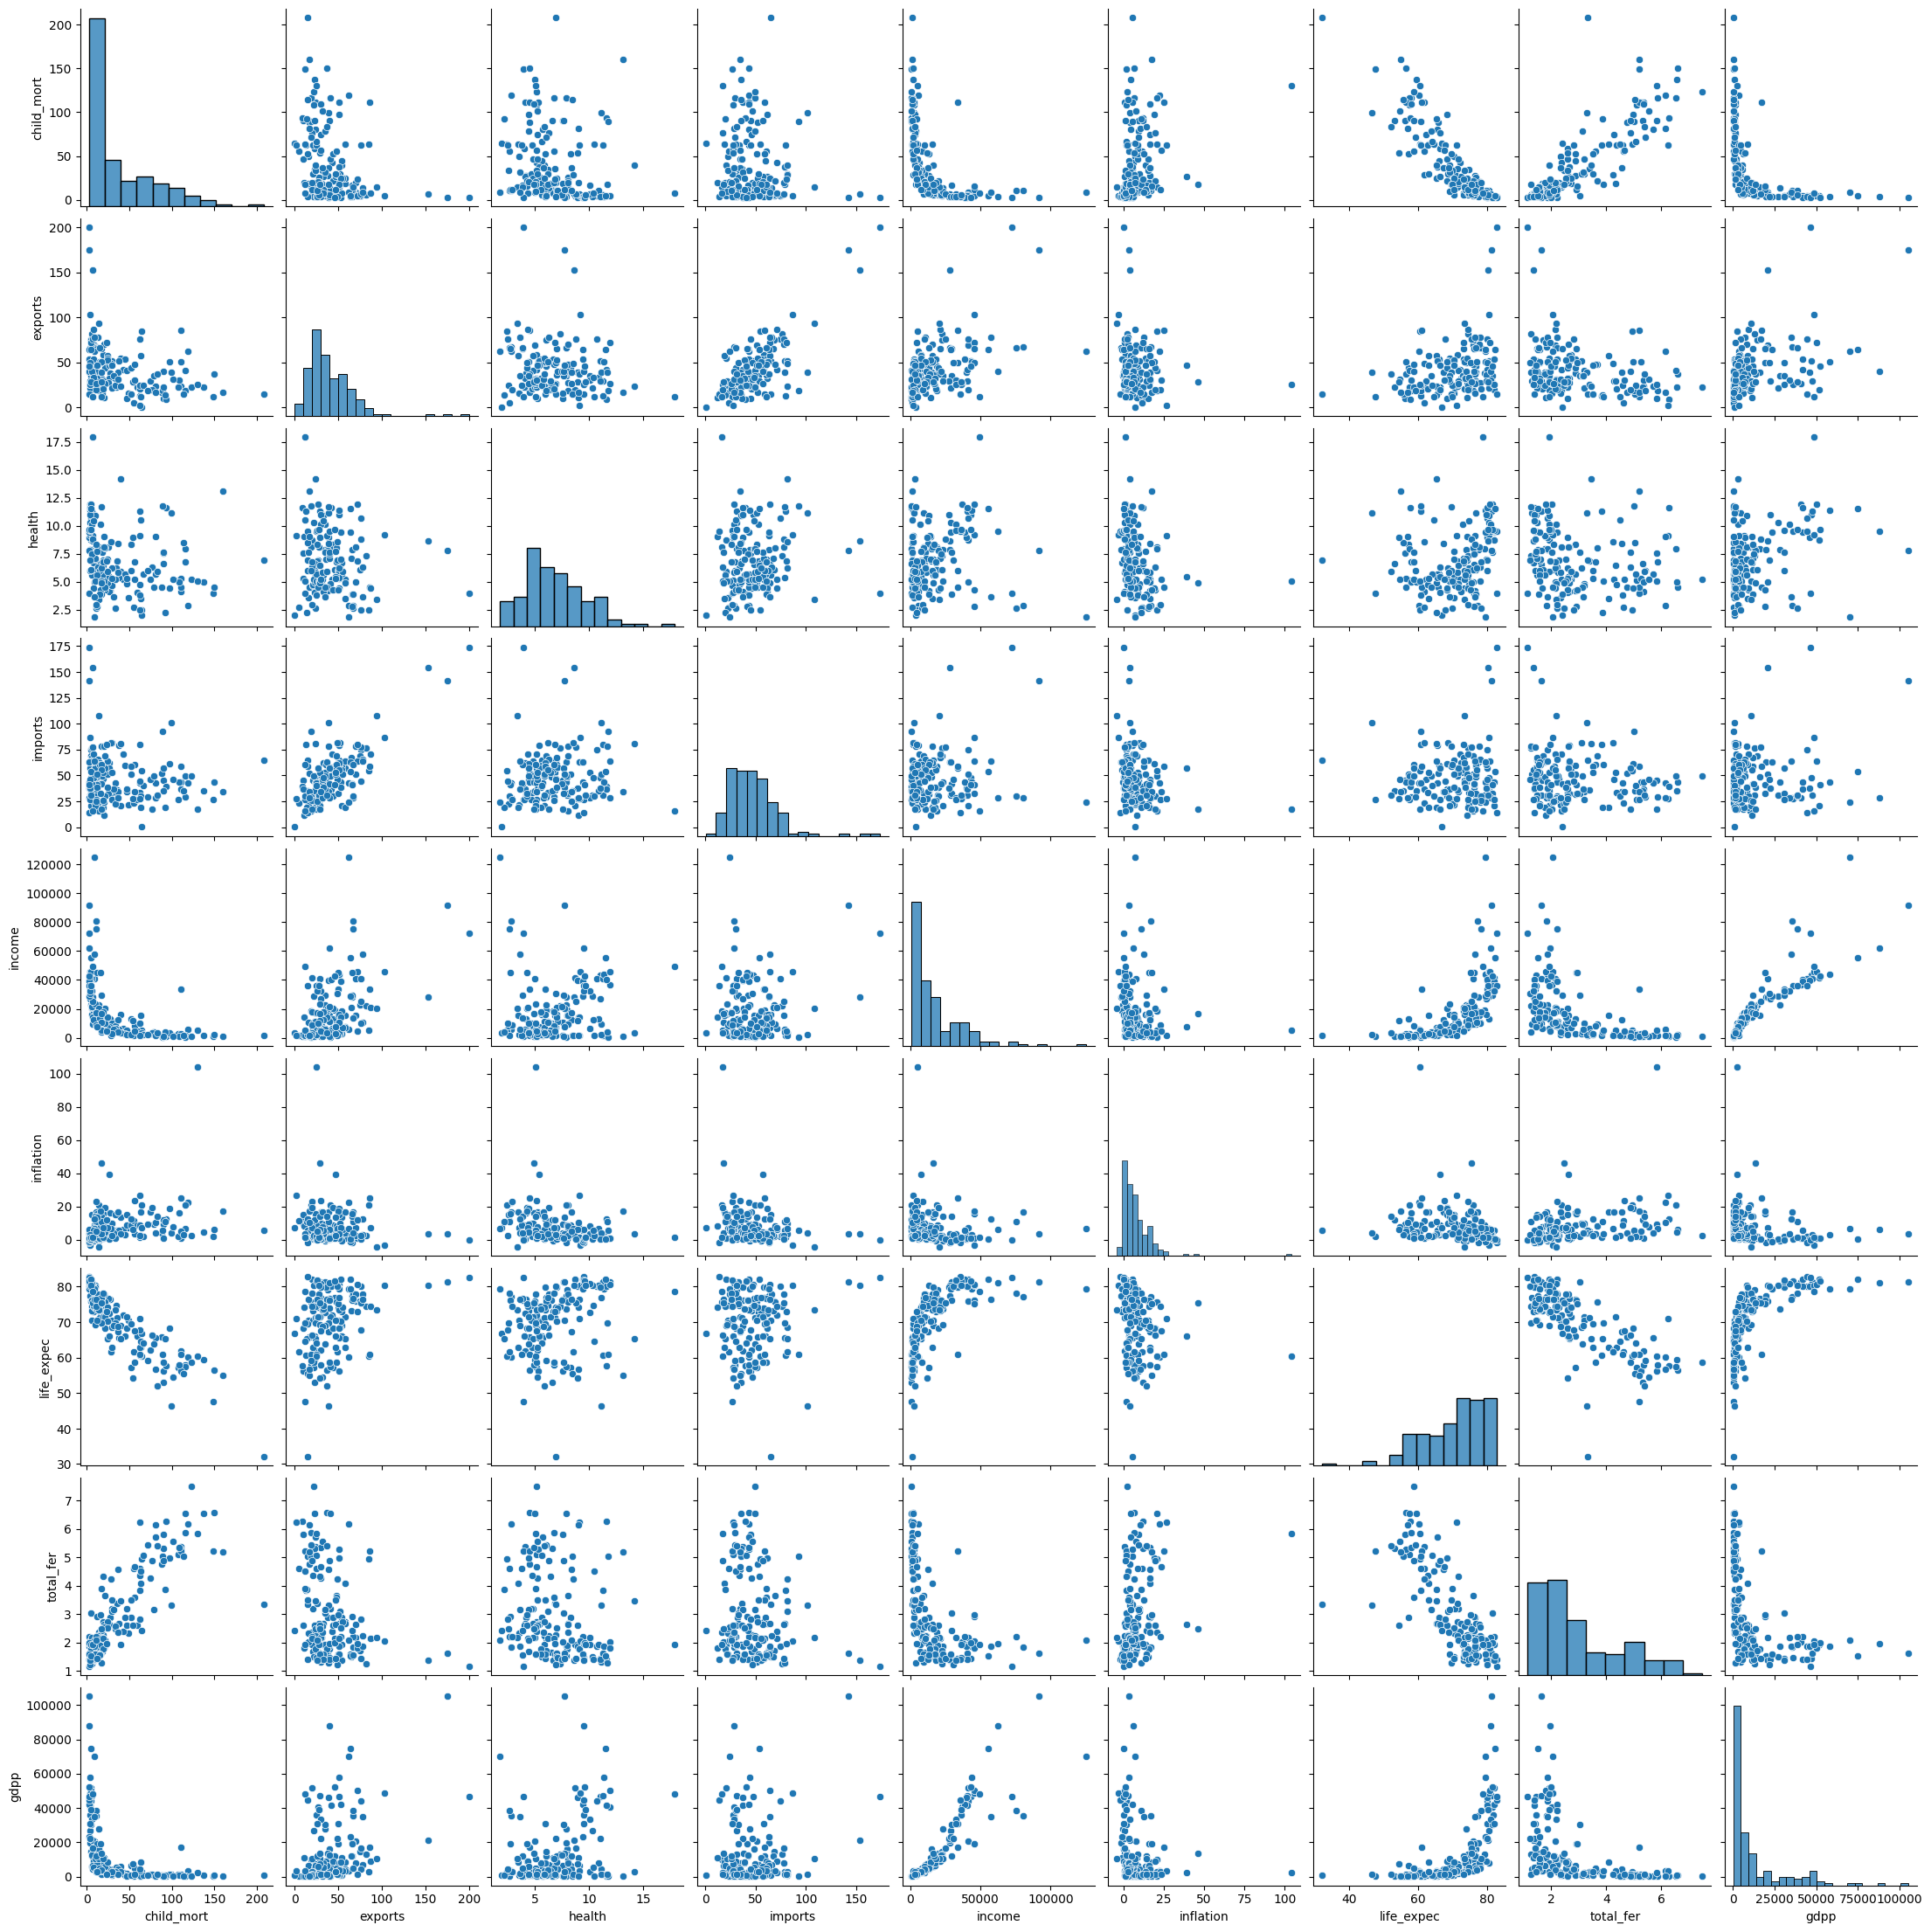

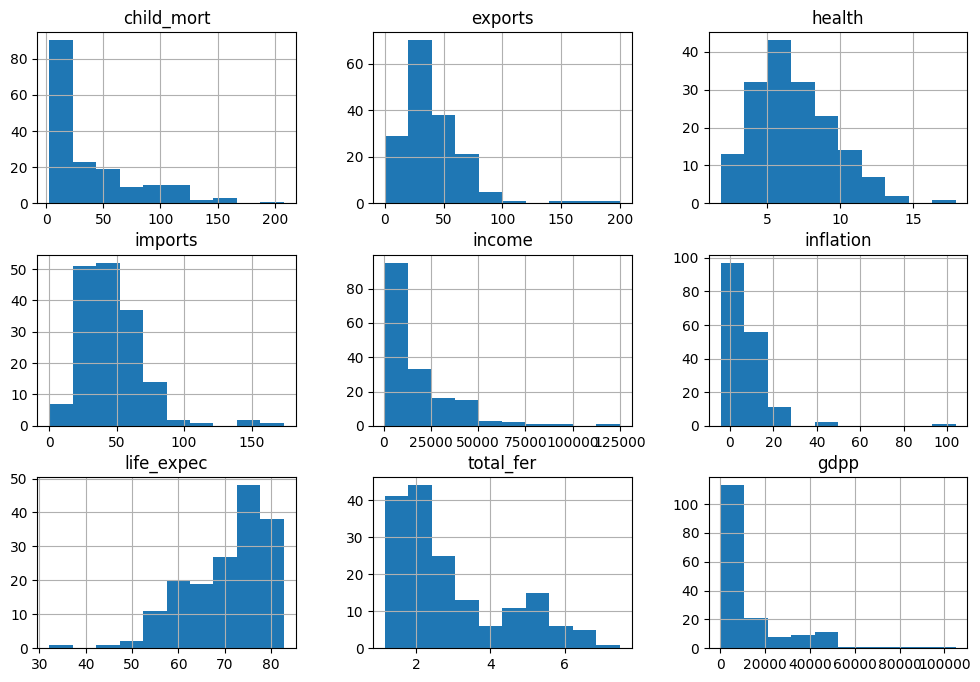

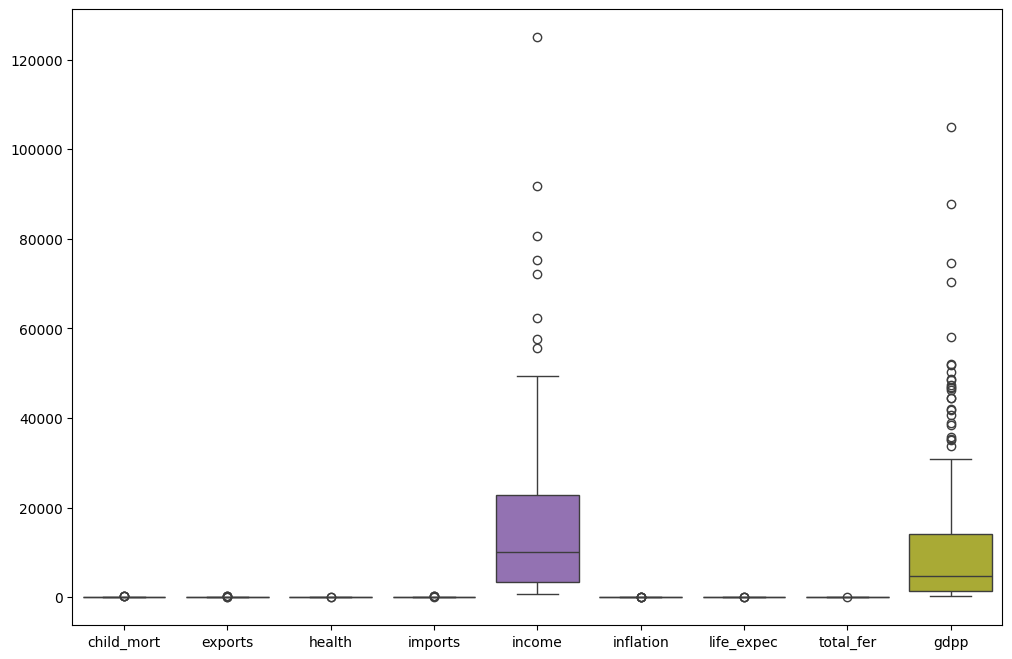

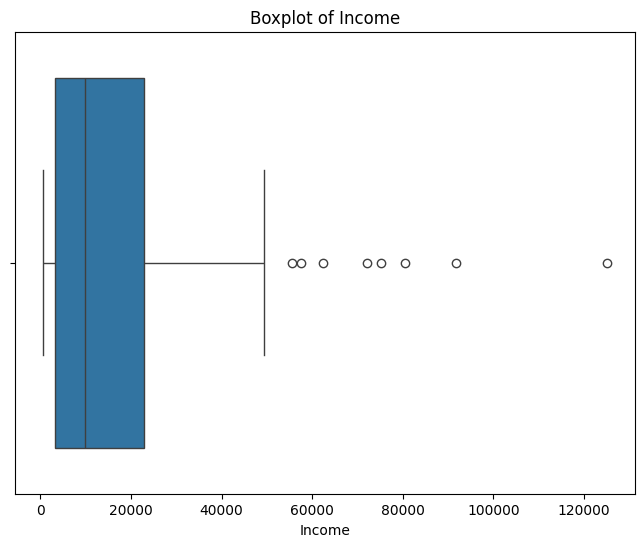

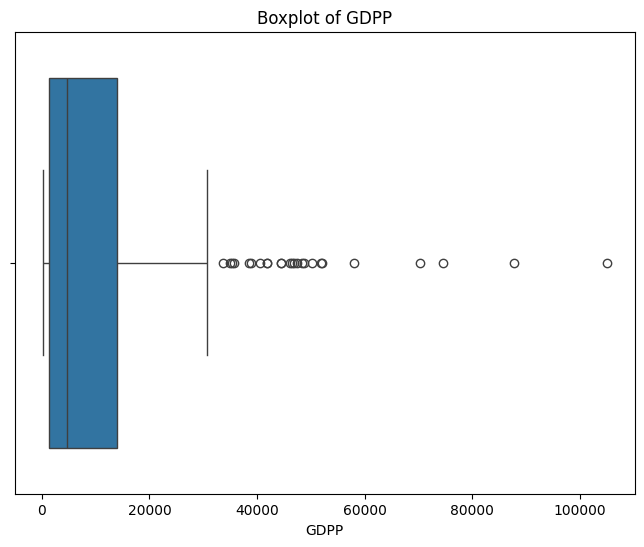

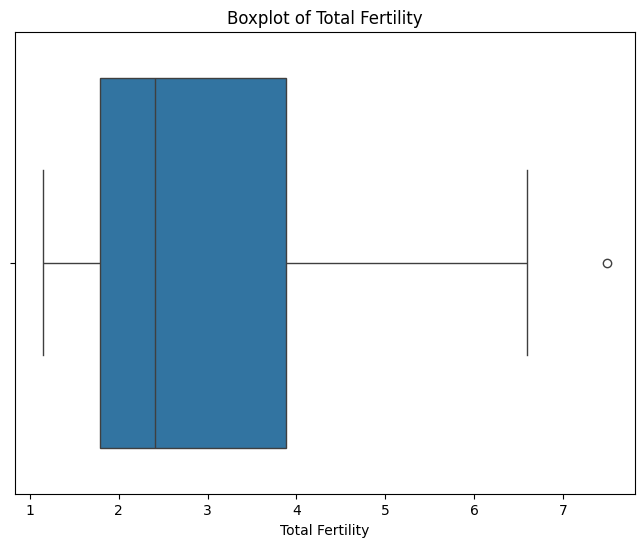

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89 

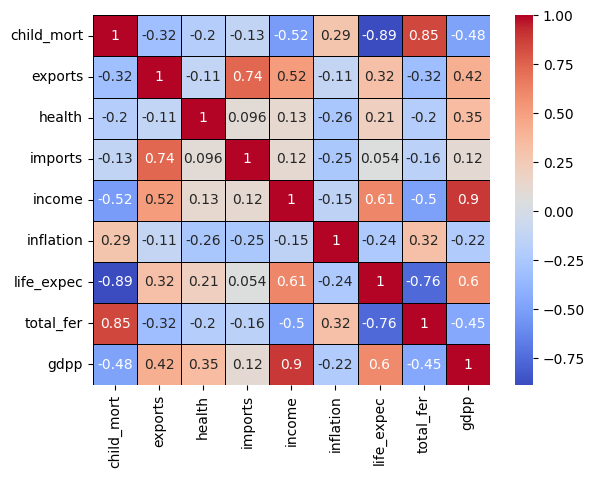

     composite_feature    wealth  Int_shipping    health  inflation
0             0.648622  0.005623      0.139614  0.358608   0.126144
1             0.081626  0.062256      0.199901  0.294593   0.080399
2             0.212204  0.077328      0.186622  0.146675   0.187691
3             0.820077  0.041470      0.283058  0.064636   0.245911
4             0.082609  0.148942      0.275189  0.262275   0.052213
..                 ...       ...           ...       ...        ...
162           0.224319  0.025389      0.262886  0.213797   0.063118
163           0.133346  0.145104      0.124193  0.192666   0.463081
164           0.124619  0.022534      0.403386  0.312617   0.150725
165           0.441395  0.022490      0.170248  0.209447   0.257000
166           0.576648  0.018126      0.181405  0.253574   0.168284

[167 rows x 5 columns]


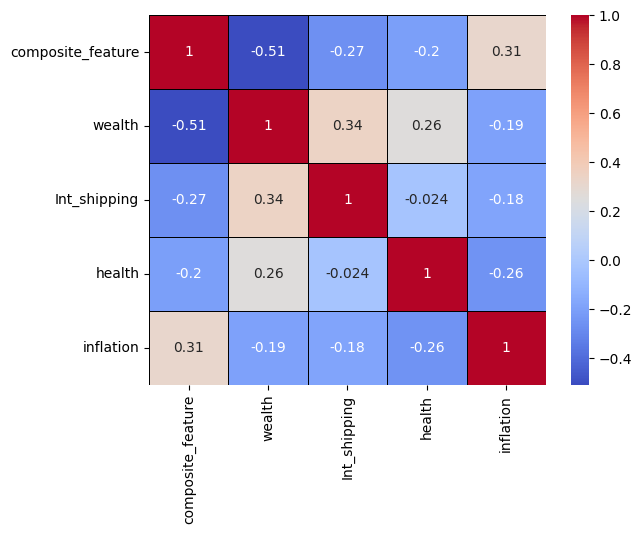

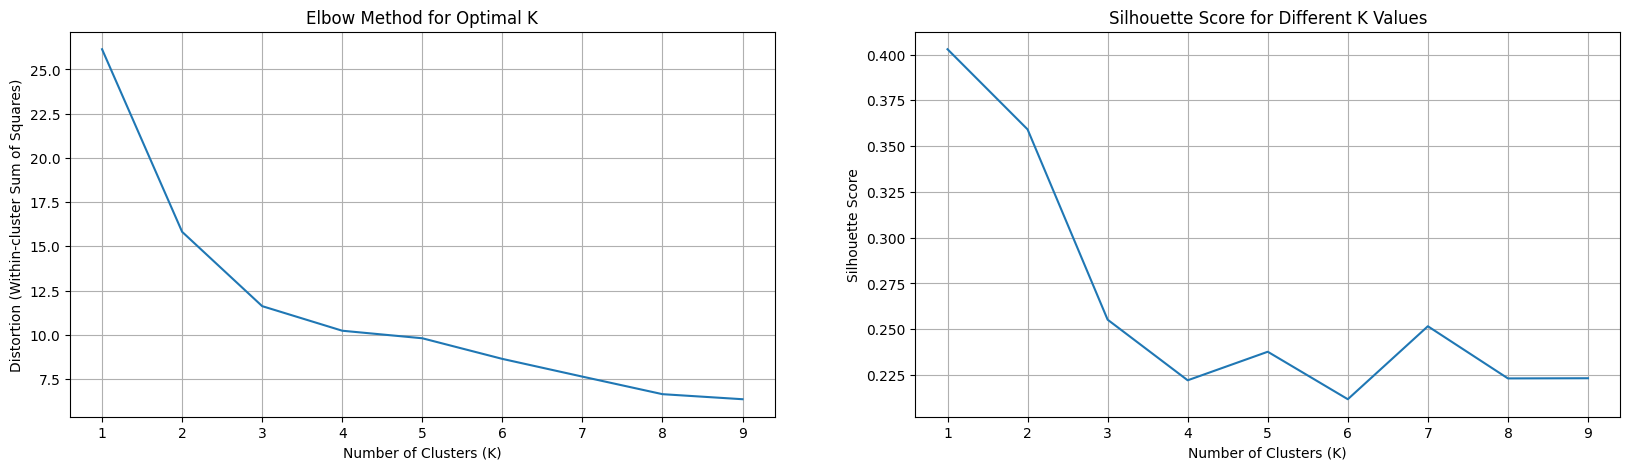

     composite_feature    wealth  Int_shipping    health  inflation  \
0             0.648622  0.005623      0.139614  0.358608   0.126144   
1             0.081626  0.062256      0.199901  0.294593   0.080399   
2             0.212204  0.077328      0.186622  0.146675   0.187691   
3             0.820077  0.041470      0.283058  0.064636   0.245911   
4             0.082609  0.148942      0.275189  0.262275   0.052213   
..                 ...       ...           ...       ...        ...   
162           0.224319  0.025389      0.262886  0.213797   0.063118   
163           0.133346  0.145104      0.124193  0.192666   0.463081   
164           0.124619  0.022534      0.403386  0.312617   0.150725   
165           0.441395  0.022490      0.170248  0.209447   0.257000   
166           0.576648  0.018126      0.181405  0.253574   0.168284   

                 country  
0            Afghanistan  
1                Albania  
2                Algeria  
3                 Angola  
4    Antigua

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, roc_curve, roc_auc_score
import plotly.express as px
import plotly.io as pio 
import geopandas as gpd
import webbrowser

data_1 = pd.read_csv('country_data.csv')
unique_count = data_1.nunique()
print(unique_count)

#All numerical features No Encoding required
data_1.isna().sum()
#No missing values

data_1.describe()
#Extremely high/low mean compared to the rest of the features are total_fer, gdpp & income

# Pairplot
sns.pairplot(data_1)
plt.show()

# Histograms
data_1.hist(figsize=(12, 8))
plt.show()

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_1)
plt.show()

# Boxplot for 'income'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_1['income'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()

# Boxplot for 'gdpp'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_1['gdpp'])
plt.title('Boxplot of GDPP')
plt.xlabel('GDPP')
plt.show()

# Boxplot for 'total_fer'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_1['total_fer'])
plt.title('Boxplot of Total Fertility')
plt.xlabel('Total Fertility')
plt.show()

#Numeric features
data_numeric = data_1.drop(['country'], axis=1)

print(data_numeric)
sns.heatmap(data_numeric.corr(), annot=True, linecolor = 'black', linewidths = 0.5, cmap ='coolwarm')
plt.show()

combined_non_scaled = pd.DataFrame()


combined_non_scaled['composite_feature'] = (data_numeric['total_fer']/data_numeric['total_fer'].mean()) + (data_numeric['child_mort']/data_numeric['child_mort'].mean()) + (data_numeric['life_expec']/data_numeric['life_expec'].mean())
combined_non_scaled['wealth'] = data_numeric['income']/data_numeric['income'].mean() + data_numeric['gdpp']/data_numeric['gdpp'].mean()
combined_non_scaled['Int_shipping'] = data_numeric['imports']/data_numeric['imports'].mean() + data_numeric['exports']/data_numeric['exports'].mean()
combined_non_scaled['health'] = data_numeric['health']/data_numeric['health'].mean()
combined_non_scaled['inflation'] = data_numeric['inflation']/data_numeric['inflation'].mean()

# Scaling

scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_non_scaled)

minmax_scaler = MinMaxScaler()
combined_scaled = minmax_scaler.fit_transform(combined_scaled)

column_names = combined_non_scaled.columns.tolist()  # Get column names as a list
new_df = pd.DataFrame(combined_scaled, columns=column_names)

print(new_df)

sns.heatmap(new_df.corr(), annot=True, linecolor = 'black', linewidths = 0.5, cmap ='coolwarm')
plt.show()

import warnings
warnings.filterwarnings("ignore")

silhouette_scores = [];kmax = 10 # max number of k values
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
distortions = []
possible_k_values = range(1, 10) 

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_df)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(possible_k_values, distortions)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Within-cluster Sum of Squares)')
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2,kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Score
plt.plot(possible_k_values, silhouette_scores)
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.show()

new_df['country'] = data_1['country']
print(new_df)
m1 = new_df.drop(columns = ['country']).values

# fitting model
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
labels = model.labels_
data_1['Class'] = labels
new_df['Class'] = labels
new_df['Labels'] = labels

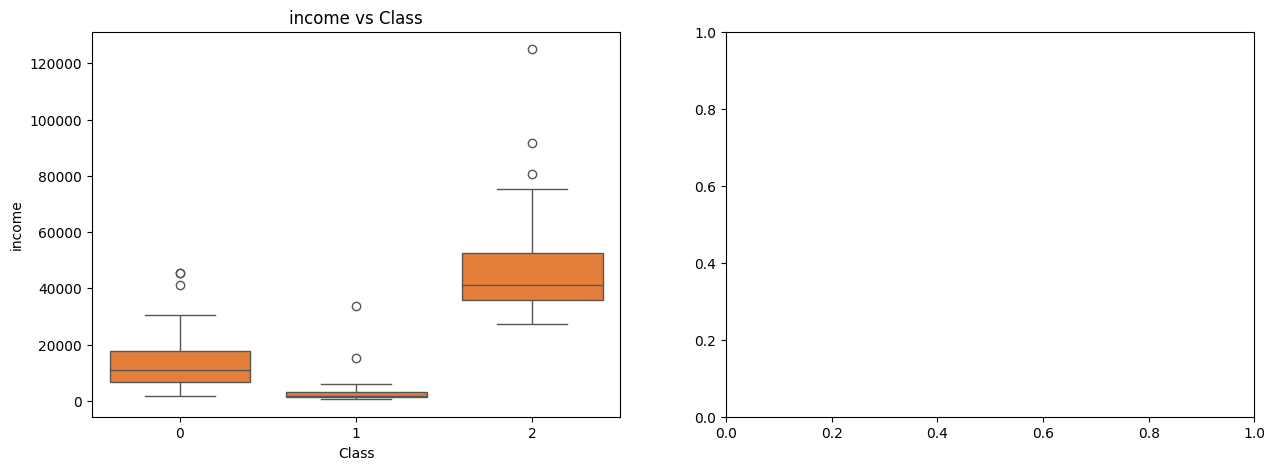

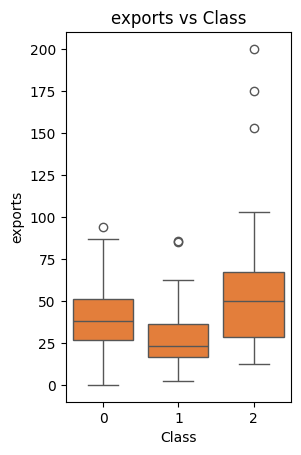

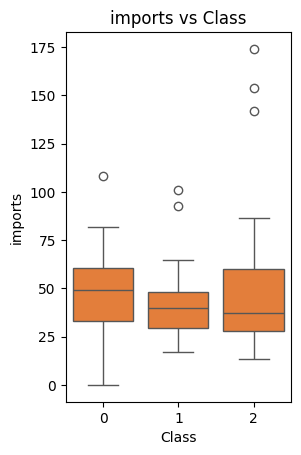

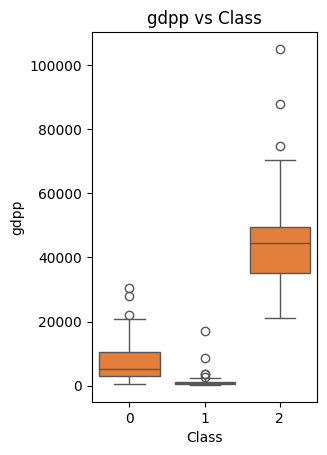

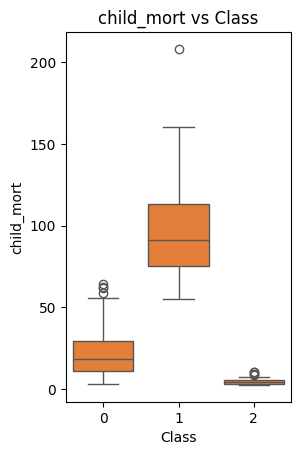

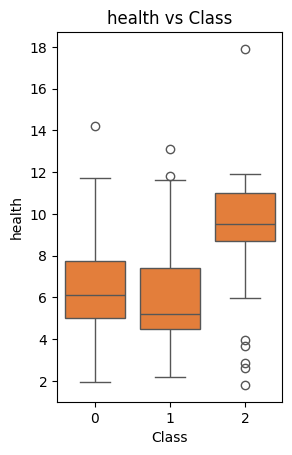

In [3]:
ig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'income', data  = data_1, color = '#FF781F')
plt.title('income vs Class')
plt.show()
plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'exports', data  = data_1, color = '#FF781F')
plt.title('exports vs Class')
plt.show()
plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'imports', data  = data_1, color = '#FF781F')
plt.title('imports vs Class')
plt.show()
plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'gdpp', data  = data_1, color = '#FF781F')
plt.title('gdpp vs Class')
plt.show()
plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data_1, color = '#FF781F')
plt.title('child_mort vs Class')
plt.show()
plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'health', data  = data_1, color = '#FF781F')
plt.title('health vs Class')

plt.show()


In [4]:

new_df['Class'].loc[new_df['Labels'] == 0] = 'Lowest Priority'
new_df['Class'].loc[new_df['Labels'] == 1] = 'Medium Priority'
new_df['Class'].loc[new_df['Labels'] == 2] = 'Highest Priority'
print(new_df)

# Filter the DataFrame to include only rows with 'Highest Priority' in the 'Class' column
highest_priority_df = new_df[new_df['Class'] == 'Highest Priority']

# Select only the 'country' and 'Class' columns
highest_priority_df = highest_priority_df[['country', 'Class']]

# Print the DataFrame containing only the 'country' and 'Class' columns for highest priority rows
print(highest_priority_df)

sorted_df = new_df[new_df['Class'] == 'Highest Priority'].sort_values(by='wealth')

# Display the sorted DataFrame
print(sorted_df[['country', 'Class', 'wealth']])


     composite_feature    wealth  Int_shipping    health  inflation  \
0             0.648622  0.005623      0.139614  0.358608   0.126144   
1             0.081626  0.062256      0.199901  0.294593   0.080399   
2             0.212204  0.077328      0.186622  0.146675   0.187691   
3             0.820077  0.041470      0.283058  0.064636   0.245911   
4             0.082609  0.148942      0.275189  0.262275   0.052213   
..                 ...       ...           ...       ...        ...   
162           0.224319  0.025389      0.262886  0.213797   0.063118   
163           0.133346  0.145104      0.124193  0.192666   0.463081   
164           0.124619  0.022534      0.403386  0.312617   0.150725   
165           0.441395  0.022490      0.170248  0.209447   0.257000   
166           0.576648  0.018126      0.181405  0.253574   0.168284   

                 country            Class  Labels  
0            Afghanistan  Medium Priority       1  
1                Albania  Lowest Priority  

In [5]:
fig = px.choropleth(new_df[['country','Class']],
                    locationmode='country names',
                    locations='country',
                    title='Needed Help Per Country (World)',
                    color=new_df['Class'],  
                    color_discrete_map={'Highest Priority': 'Red',
                                        'Lowest Priority': 'Green',
                                        'Medium Priority': 'Yellow'}
                   )

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Labels', legend_title_side='top', title_pad_l=260, title_y=0.86)

pio.orca.config.use_xvfb = True  # Set this to True if running in a headless environment
fig.write_html('choropleth_plot.html')

import webbrowser

# Specify the path to the HTML file
html_file_path = 'choropleth_plot.html'

# Open the HTML file in the default web browser
webbrowser.open(html_file_path)

True